# 2017 Kaggle Machine Learning & Data Science Survey

In [1]:
# Description

In [2]:
# TAble of Contents

In [3]:
## 1. Importing and Preprocessing
### 1.1 Importing data

In [4]:
%matplotlib inline

# - Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np # Python에서 벡터, 행렬 등 수치 연산을 수행하는 선형대수(Linear algebra) 라이브러리입니다
from scipy import stats #Scipy는 기본적으로 Numpy, Matplotlib, pandas, Sympy등 과 함께 동작을 합니다. SciPy는 수치적분 루틴과 미분방정식 해석기, 방정식의 근
import matplotlib.pyplot as plt # 이썬에서 데이타를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지로서 가장 많이 사용되는 데이타 시각화(Data Visualization) 패키지로
import seaborn as sns #seaborn 패키지는 데이터프레임으로 다양한 통계 지표를 낼 수 있는 시각화 차트를 제공
# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [5]:
# There are 5 data files 
# Schema.csv
# multipleChoiceResponses.csv = 
# freeformResponses.dsv:
# conversionRates/csv:
# RespondentTypeREADME.txt: schema.csv 

In [6]:
#Load schema into a Pandas DataFrame
question = pd.read_csv("c://Kaggle_data/schema.csv")
question.shape

(290, 3)

In [7]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [8]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [9]:
#Load MCQ Responses into a Pandas DataFrame
mcq = pd.read_csv('c://Kaggle_data/multipleChoiceResponses.csv',
                 encoding="ISO-8859-1", low_memory=False)
mcq.shape

#16716 has reponded 

(16716, 228)

In [10]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [11]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

## 1.2 Survey Demographics


<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

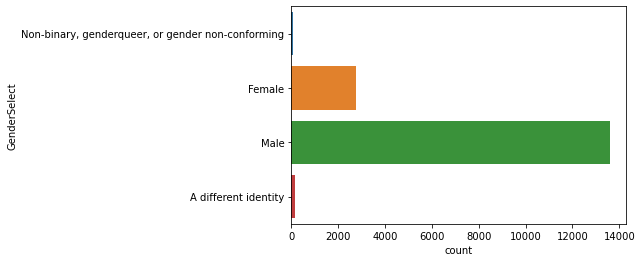

In [13]:
### Gender
# sns의 countplot으로 그리면 쉽게 시각화 할수 있다 
# Male is more than Female
sns.countplot(y='GenderSelect', data=mcq)

In [14]:
#Create a DataFrame for number of respondents by country
con_df = pd.DataFrame(mcq['Country'].value_counts())
print(con_df)

                             Country
United States                   4197
India                           2704
Other                           1023
Russia                           578
United Kingdom                   535
People 's Republic of China      471
Brazil                           465
Germany                          460
France                           442
Canada                           440
Australia                        421
Spain                            320
Japan                            277
Taiwan                           254
Italy                            238
Netherlands                      205
Ukraine                          196
South Korea                      194
Poland                           184
Singapore                        184
Pakistan                         161
Turkey                           144
Indonesia                        131
Switzerland                      129
South Africa                     127
Mexico                           126
C

In [15]:
#Create a DataFrame for number of respondents by country
con_df = pd.DataFrame(mcq['Country'].value_counts())

#Country column을 인덱스로 지정해주고, Column의 순서대로 num_resp, country로 지정
con_df['국가'] = con_df.index 
con_df.columns = ['응답수', '국가']

#index column을 삭제하고 순위를 알기위해 reset_index()해준다
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [16]:
#연령에 대한 정보
# more than 75% of the respondence are being under 37 years old
# average age of the respondnets are 32
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

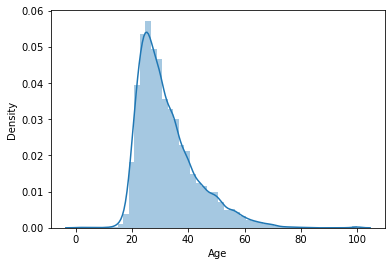

In [17]:
#연령에 대해 시각화 해보기 - seaborn엣 distplot으로 해보기 
sns.distplot(mcq[mcq['Age'] >0]['Age'])

# Level of Education

In [18]:
mcq['FormalEducation'].describe()

count               15015
unique                  7
top       Master's degree
freq                 6273
Name: FormalEducation, dtype: object

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

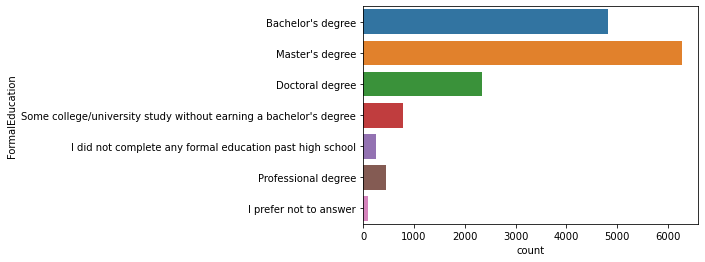

In [19]:
sns.countplot(y='FormalEducation', data=mcq)
# A large fraction of our users have a Master's Degree which alludes the importance of formal education in the field of Data Science. Bachelor's Degree holders come in second. A considerable number of people also have a Doctoral Degree which, I suspect, is much higher than related fields such as Software Engineering or Web Development.

In [20]:
# Create a DataFrame for number of respondents by FormalEducation

mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
print(mcq_major_count)

#normalize=Ture 옵션을 사용하면, 해당데이터가 전체 데이터에서 어느정도 비율을 차지하는지 알 수 있다
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))

# mcq_major_count와 mcq_major_percent를 merge하여 mcq_maor_df 변수로 지정
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_df.columns = ['응답수', '비율']
mcq_major_df

                                                    MajorSelect
Computer Science                                           4397
Mathematics or statistics                                  2220
Engineering (non-computer focused)                         1339
Electrical Engineering                                     1303
Other                                                       848
Physics                                                     830
Information technology, networking, or system a...          693
A social science                                            531
Biology                                                     274
Management information systems                              237
A humanities discipline                                     198
A health science                                            152
Psychology                                                  137
I never declared a major                                     65
Fine arts or performing arts            

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

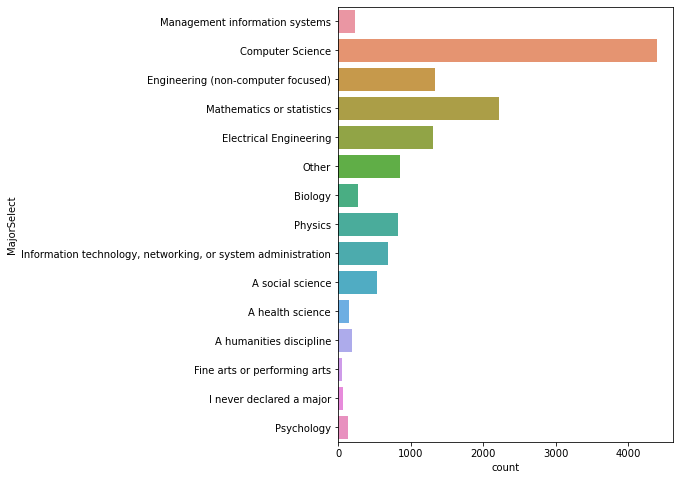

In [21]:
#Education
#data scientist currenly inrolled in schools from the main data
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

#computer science is the most degree that the students currenly enrolled in school.

In [22]:
#Employment Status & Rates
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columnns = ['응답수', '비율']
mcq_es_df

#over 65%of respondents are employed as full-time, followed by not employed, but looking for job


,EmploymentStatus_x,EmploymentStatus_y
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

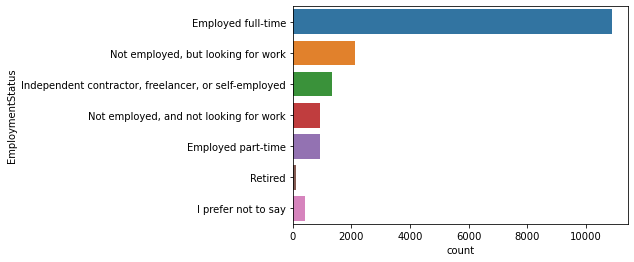

In [24]:
#Employment status 
sns.countplot(y='EmploymentStatus', data=mcq)

In [25]:
#Student Count
mcq_st_count = pd.DataFrame(mcq['StudentStatus'].value_counts())
mcq_st_count

,StudentStatus
Yes,981
No,299


<AxesSubplot:xlabel='count', ylabel='StudentStatus'>

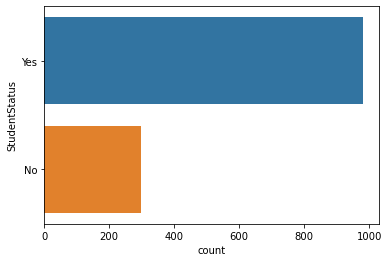

In [26]:
sns.countplot(y='StudentStatus', data=mcq)

<AxesSubplot:xlabel='count', ylabel='Tenure'>

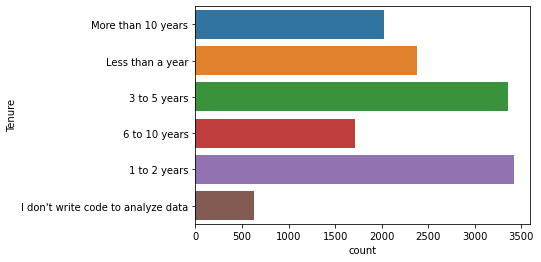

In [27]:
#Programming Experience
sns.countplot(y="Tenure", data=mcq)


### - most of all, less than 5 years of programming experience, especailly 1-2 years of experience

The number of interviewees in Korea:194


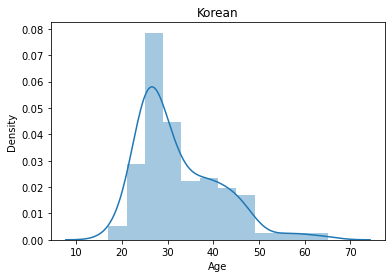

In [28]:
# Korea data

korea = mcq.loc[(mcq['Country'] == 'South Korea')]
print('The number of interviewees in Korea:' + str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [29]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

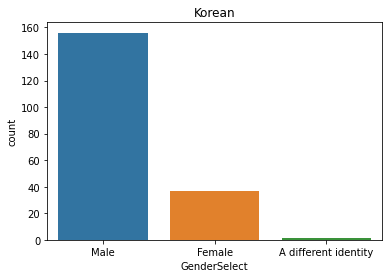

In [30]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'Korean Male')

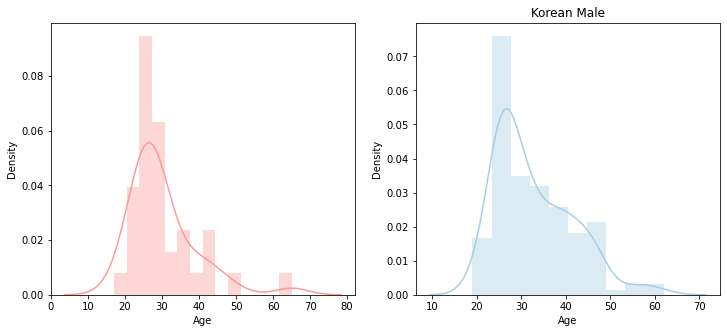

In [31]:
#성별을 연령대별로 시각화 
#20후반에서 30대 초반이 많음 

figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('Korean Male')

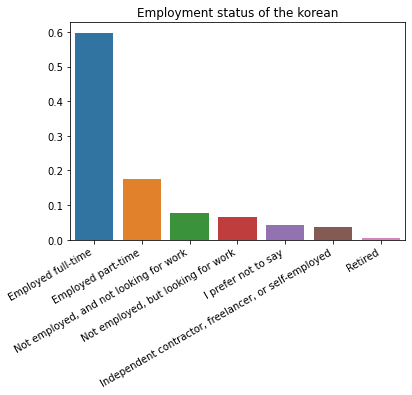

In [32]:
#Employment Status in Korea
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

#most of the korean are full-time employeed

The number of interviewees in United States:4197


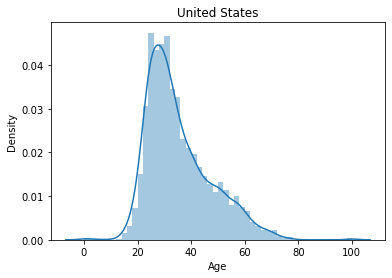

KeyError: 'united_states1'

In [33]:
#United States Data

united_states1 = mcq.loc[(mcq['Country'] == 'United States')]
print('The number of interviewees in United States:' + str(united_states1.shape[0]))
sns.distplot(united_states1['Age'].dropna())
plt.title('United States')
plt.show()
united_states1 = pd.DataFrame(mcq['united_states1'])


In [34]:
pd.DataFrame(united_states1['GenderSelect'].value_counts())

,GenderSelect
Male,3252
Female,872
A different identity,37
"Non-binary, genderqueer, or gender non-conforming",26


In [35]:
# 한국 데이터만 뽑아오는 법
korea = mcq.loc[(mcq['Country'] == 'South Korea')]
korea

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
356,Male,South Korea,27.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,Female,South Korea,36.0,Employed full-time,NaN,NaN,No,Yes,Researcher,Fine,...,Very Important,Very Important,Very Important,Somewhat important,Somewhat important,Very Important,Somewhat important,Not important,Not important,Not important
491,Male,South Korea,34.0,Employed part-time,NaN,NaN,Yes,NaN,Scientist/Researcher,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,Male,South Korea,53.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,Male,South Korea,35.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,Very Important,Not important,Not important,Not important,Somewhat important,Somewhat important,Very Important,Not important,Somewhat important,Not important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16466,Male,South Korea,38.0,Employed full-time,NaN,NaN,Yes,NaN,Researcher,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16540,Male,South Korea,24.0,"Not employed, and not looking for work",No,"Yes, I'm focused on learning mostly data scien...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16583,Male,South Korea,37.0,Employed full-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16671,Male,South Korea,34.0,Employed full-time,NaN,NaN,No,Yes,Other,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
us =  mcq.loc[(mcq['Country'] == 'United States')]
us

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Male,United States,58.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Male,United States,26.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Male,United States,27.0,Employed part-time,NaN,NaN,Yes,NaN,Statistician,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16631,Female,United States,41.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16668,Male,United States,24.0,"Not employed, and not looking for work",Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16675,Male,United States,23.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
china = mcq.loc[(mcq['Country'] == 'People \'s Republic of China')]
china

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
49,Male,People 's Republic of China,25.0,"Not employed, and not looking for work",Yes,"Yes, I'm focused on learning mostly data scien...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,Male,People 's Republic of China,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Important
193,Male,People 's Republic of China,25.0,Employed full-time,NaN,NaN,No,Yes,Researcher,Fine,...,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important
438,Male,People 's Republic of China,22.0,"Not employed, and not looking for work",Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,Somewhat important,Very Important,Very Important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Very Important,Very Important,Very Important
474,Female,People 's Republic of China,27.0,Employed full-time,NaN,NaN,No,Yes,Other,Poorly,...,Very Important,Very Important,Very Important,Somewhat important,Very Important,Very Important,Very Important,Very Important,Very Important,Somewhat important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16685,Male,People 's Republic of China,27.0,Employed full-time,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16696,Male,People 's Republic of China,24.0,"Not employed, and not looking for work",Yes,"Yes, I'm focused on learning mostly data scien...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16699,Male,People 's Republic of China,30.0,Employed full-time,NaN,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16709,Male,People 's Republic of China,34.0,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
pd.DataFrame(china['GenderSelect'].value_counts())


,GenderSelect
Male,393
Female,74
A different identity,3


Text(0.5, 1.0, 'chinese')

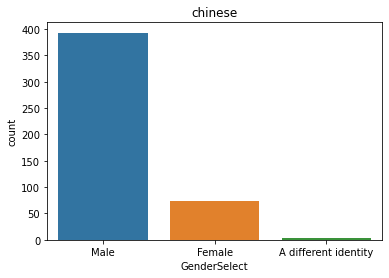

In [39]:
sns.countplot(x='GenderSelect', data=china)
plt.title('chinese')

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

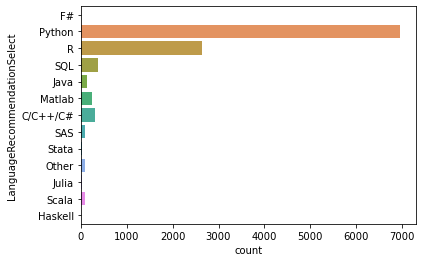

In [40]:
# FAQ 질문들

# no.1 - which programming lagnust is the most recommended to learn?

sns.countplot(y='LanguageRecommendationSelect', data=mcq)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

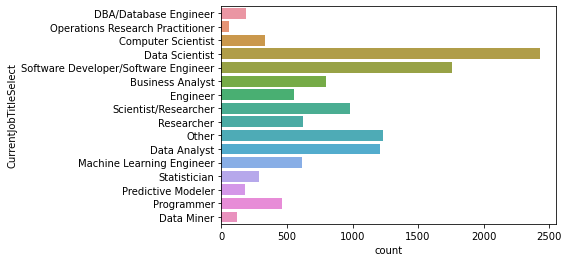

In [41]:
# 현재 하고있는일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [42]:
pd.DataFrame(mcq['Country'].value_counts())


,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535
People 's Republic of China,471
Brazil,465
Germany,460
France,442
Canada,440


In [43]:
mcq.groupby('GenderSelect').count()

,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
GenderSelect,,,,,,,,,,,,,,,,,,,,,
A different identity,152,153,159,24,25,124,38,106,98,100,...,20,21,21,21,20,21,21,21,20,21
Female,2768,2714,2778,269,272,2023,479,1803,1764,1781,...,667,665,667,666,663,668,667,664,665,666
Male,13581,13427,13610,973,972,10924,2468,9826,9557,9632,...,2731,2711,2708,2706,2693,2716,2702,2698,2707,2716
"Non-binary, genderqueer, or gender non-conforming",71,70,74,8,8,57,13,51,51,51,...,13,13,13,13,13,14,13,13,13,14


In [44]:
mcq.groupby('GenderSelect').describe()

Age             \
                                                     count       mean   
GenderSelect                                                            
A different identity                                 153.0  36.725490   
Female                                              2714.0  30.243552   
Male                                               13427.0  32.740895   
Non-binary, genderqueer, or gender non-conforming     70.0  33.928571   

                                                                          \
                                                         std  min    25%   
GenderSelect                                                               
A different identity                               20.562240  0.0  25.00   
Female                                              9.001904  0.0  24.00   
Male                                               10.485324  0.0  25.00   
Non-binary, genderqueer, or gender non-conforming  15.812599  0.0  25.25   

                                                                      \
                                                    50%   75%    max   
GenderSelect                                                           
A different identity                               32.0  40.0  100.0   
Female                                             28.0  34.0   77.0   
Male                                               30.0  38.0  100.0   
Non-binary, genderqueer, or gender non-conforming  30.0  38.0  100.0   

                                                  LearningCategorySelftTaught  \
                                                                        count   
GenderSelect                                                                    
A different identity                                                    103.0   
Female                                                                 2106.0   
Male                                                                  10804.0   
Non-binary, genderqueer, or gender non-conforming                        51.0   

                                                              ...  \
                                                        mean  ...   
GenderSelect                                                  ...   
A different identity                               37.640777  ...   
Female                                             27.411681  ...   
Male                                               34.495280  ...   
Non-binary, genderqueer, or gender non-conforming  33.294118  ...   

                                                  TimeFindingInsights         \
                                                                  75%    max   
GenderSelect                                                                   
A different identity                                             20.0  100.0   
Female                                                           20.0  303.0   
Male                                                             20.0  100.0   
Non-binary, genderqueer, or gender non-conforming                20.0   60.0   

                                                  TimeOtherSelect            \
                                                            count      mean   
GenderSelect                                                                  
A different identity                                         53.0  0.660377   
Female                                                     1108.0  1.520758   
Male                                                       6299.0  2.568344   
Non-binary, genderqueer, or gender non-conforming            35.0  2.714286   

                                                                             \
                                                         std  min  25%  50%   
GenderSelect                                                                  
A different identity                                3.106714  0.0  0.0  0.0   
Female                

In [45]:
korea.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect
count,191.000000,141.000000,138.000000,141.000000,140.000000,141.000000,141.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,32.209424,34.943262,23.384058,16.553191,16.942857,4.765957,4.028369,34.203704,23.870370,10.314815,12.796296,13.537037,1.574074
std,8.870894,26.411516,24.522393,22.256757,25.165001,10.338305,13.634485,19.986202,13.522931,9.006966,8.766100,12.603852,10.895043
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,19.250000,0.000000,6.250000,5.000000,0.000000
50%,29.000000,30.000000,19.500000,10.000000,0.000000,0.000000,0.000000,30.000000,20.000000,10.000000,10.000000,10.000000,0.000000
75%,38.000000,50.000000,40.000000,25.000000,25.000000,5.000000,0.000000,50.000000,30.000000,20.000000,20.000000,20.000000,0.000000
max,65.000000,100.000000,100.000000,100.000000,100.000000,60.000000,90.000000,78.000000,60.000000,40.000000,30.000000,70.000000,80.000000


In [74]:
a = pd.DataFrame(korea['EmploymentStatus'].value_counts())
b = pd.DataFrame(korea['EmploymentStatus'].value_counts(normalize=True))

c = a.merge(b, left_index=True, right_index=True)
c.columns = ['respondent', 'rate']
c

,respondent,rate
Employed full-time,116,0.597938
"Not employed, but looking for work",34,0.175258
"Not employed, and not looking for work",15,0.077320
"Independent contractor, freelancer, or self-employed",13,0.067010
I prefer not to say,8,0.041237
Employed part-time,7,0.036082
Retired,1,0.005155


In [78]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

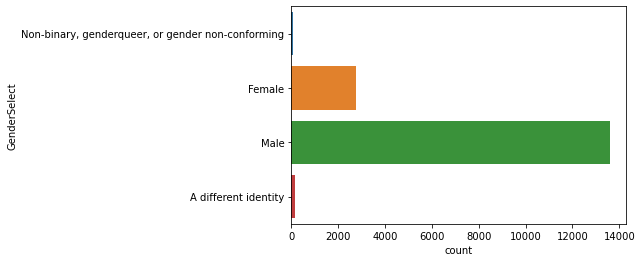

In [96]:
sns.countplot(y='GenderSelect', data=mcq)